<h6 style= 'color: blue'> Симуляция распространения болезни </h6>




Набор данных представляет собой основные маршруты авиаперелетов в США за один месяц 2008-го года. В качестве модели распространения инфекции предлагается использовать SI (susceptible-infected) модель, в которой каждый аэропорт имеет два возможных состояния - “здоровый” или “зараженный”. Здоровый аэропорт может заразиться с некоторой вероятностью p (infection probability), если к нему прилетает самолет из зараженного города. Инфекция начинает распространение из некоторого стартового аэропорта и заканчивает распространение, когда все перелеты из датасета завершены.
-Часть 1. Пишем симуляцию.
Напишите функцию для симуляции одного прохода по всему датасету и распространения инфекции. Функция должна принимать на вход стартовый город, в котором изначально началась инфекция и вероятность распространения инфекции p. На выходе функция должна возвращать словарь, в котором ключом будет время заражения аэропорта, значением - название аэропорта. В теле функции вам нужно написать проход по всему датасету (имеет смысл использовать itertuples), где вы будете проверять, является ли текущий рейс “заразным” и если да - с вероятностью p заражать новый аэропорт.
В качестве стартовой ноды/аэропорта для симуляций можно использовать Allentown (node_id = 0).

-Часть 2. Как инфекционность (вероятность заражения) болезни влияет на скорость распространения?
Давайте посмотрим, насколько заразной должна быть болезнь, чтобы заразить все аэропорты в сети. Для каждой из вероятностей p=[0.01, 0.05, 0.1, 0.5, 1.] прогоните по 10 симуляций распространения, каждый раз сохраняя результаты.
Для каждых 12 часов симуляции посчитайте, какой средний процент аэропортов от общего их числа, был заражен к этому моменту времени. Постройте графики числа зараженных городов в зависимости от времени для каждой из вероятностей.

-Часть 3. Может ли информация о сети помочь предсказать, кто будет заражен?
Настало время поработать с NetworkX. По имеющемуся датасету вам нужно построить ненаправленный граф всех аэропортов, используя относительное число перелетов между соседними аэропортами в качестве веса ребра. Например, если из аэропорта А в аэропорт Б суммарно есть 5 рейсов, из Б в А 10 рейсов, а всего в сети 150 перелетов, то вес ребра между А и Б должен быть равен (5+10)/150 = 0.1.
Прогоните вашу симуляцию 50 раз, используя p=0.5 и стартовый аэропорт Allentown, каждый раз сохраняя результаты. Используя данные симуляций посчитайте медианное время до заражения каждого города.
Теперь используя построенный вами граф, для каждого города посчитайте его коэффициент кластеризации (nx.clustering), степень (nx.degree) и центральность (nx.betweenness_centrality).
Наконец, постройте scatter-plot-ы для медианного времени заражения и каждой из рассчитанных выше метрик. Также посчитайте коэффициент корреляции Спирмана между этими показателями и попробуйте проинтерпретировать полученные результаты. Какая из метрик графа сильнее всего скоррелирована со временем заражения? Почему?
https://www.kaggle.com/datasets/vikalpdongre/us-flights-data-2008


Тема: Содержание датасета о рейсах в США в 2008 году (основные маршруты авиаперелетов в США за один месяц 2008-го года). Это очень интересная и актуальная тема, особенно в свете пандемии COVID-19.
- Проведем анализ данных, визуализацию результатов и созданием симуляции распространения инфекции.
- В первой части мы напишем функцию для симуляции одного прохода по всему датасету и распространения инфекции.
- Во второй части исследуем, как вероятность заражения влияет на скорость распространения инфекции.
- В третьей части построим граф аэропортов и вычислить различные метрики графа, а также их связь с временем заражения.

 > - В качестве модели распространения инфекции я буду использовать SI (susceptible-infected) модель, в которой каждый аэропорт имеет два возможных состояния - “здоровый” или “зараженный”.
 > - Здоровый аэропорт может заразиться с некоторой вероятностью p (infection probability), если к нему прилетает самолет из зараженного города.
 > - Инфекция начинает распространение из некоторого стартового аэропорта и заканчивает распространение, когда все перелеты из датасета завершены.

 > Часть 1. Пишем симуляцию.

Для начала мы загрузим и подготовить данные о перелетах:

Для начала, давайте загрузим датасет о рейсах в США в 2008 году с сайта Kaggle и посмотрим на его структуру.
https://www.kaggle.com/datasets/vikalpdongre/us-flights-data-2008/code?datasetId=11045

In [ ]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import dateutil
import pytz
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import spearmanr

In [ ]:
# загружаем данные о перелетах из csv-файла
# используем параметр parse_dates для преобразования столбцов с датами в формат datetime
flights_data = pd.read_csv('us-flights-data-2008.csv')


In [ ]:
flights_data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955.0,2211.0,2225.0,WN,335.0,...,4.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735.0,1002.0,1000.0,WN,3231.0,...,5.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620.0,804.0,750.0,WN,448.0,...,3.0,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930.0,1054.0,1100.0,WN,1746.0,...,3.0,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755.0,1959.0,1925.0,WN,3920.0,...,3.0,10.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,32.0


 > Перевод колонок:
Year - Год
Month - Месяц
DayofMonth - День месяца
DayOfWeek - День недели
DepTime - Время вылета
CRSDepTime - Запланированное время вылета
ArrTime - Время прилёта
CRSArrTime - Запланированное время прилёта
UniqueCarrier - Уникальный перевозчик
FlightNum - Номер рейса
TaxiIn - Время таксирования при прибытии
TaxiOut - Время таксирования при вылете
Cancelled - Отменён
CancellationCode - Код отмены
Diverted - Изменён маршрут
CarrierDelay - Задержка из-за перевозчика
WeatherDelay - Задержка из-за погоды
NASDelay - Задержка из-за национальной авиационной системы
SecurityDelay - Задержка из-за проблем безопасности
LateAircraftDelay - Задержка из-за опоздания воздушного судна

In [ ]:
# Предварительный анализ данных
print(flights_data.head())  # Выводим первые пять строк таблицы



   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0      1955.0   2211.0   
1  2008      1           3          4    754.0       735.0   1002.0   
2  2008      1           3          4    628.0       620.0    804.0   
3  2008      1           3          4    926.0       930.0   1054.0   
4  2008      1           3          4   1829.0      1755.0   1959.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0      2225.0            WN      335.0  ...    4.0      8.0        0.0   
1      1000.0            WN     3231.0  ...    5.0     10.0        0.0   
2       750.0            WN      448.0  ...    3.0     17.0        0.0   
3      1100.0            WN     1746.0  ...    3.0      7.0        0.0   
4      1925.0            WN     3920.0  ...    3.0     10.0        0.0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN       0.0           NaN          NaN   

In [ ]:
print(flights_data.describe())  # Статистическое описание данных

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1745890.0  1.745890e+06  1.745890e+06  1.745890e+06  1.692558e+06   
mean      2008.0  1.980024e+00  1.580247e+01  3.931993e+00  1.342691e+03   
std          0.0  8.207057e-01  8.779211e+00  1.984628e+00  4.800194e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  1.000000e+00  8.000000e+00  2.000000e+00  9.330000e+02   
50%       2008.0  2.000000e+00  1.600000e+01  4.000000e+00  1.333000e+03   
75%       2008.0  3.000000e+00  2.300000e+01  6.000000e+00  1.735000e+03   
max       2008.0  3.000000e+00  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.745889e+06  1.688097e+06  1.745889e+06  1.745889e+06   
mean   1.331221e+03  1.487439e+03  1.497389e+03  2.250111e+03   
std    4.650057e+02  5.080756e+02  4.835298e+02  1.967961e+03   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.0000

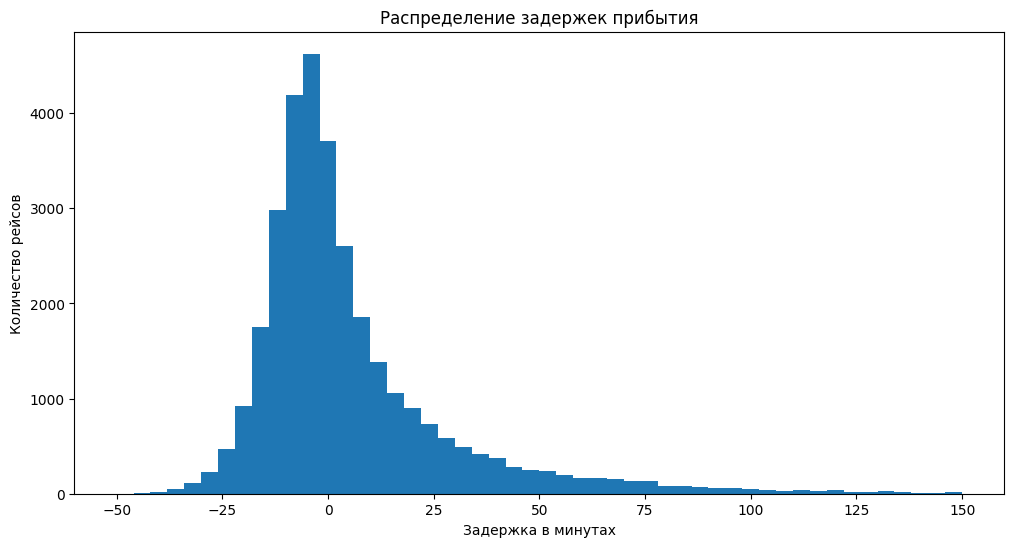

In [ ]:
# Визуализация данных
plt.figure(figsize=(12, 6))
plt.hist(flights_data['ArrDelay'], bins=50, range=[-50, 150])
plt.title('Распределение задержек прибытия')
plt.xlabel('Задержка в минутах')
plt.ylabel('Количество рейсов')
plt.show()

- В данном случае, flights_data['ArrDelay'] — это столбец в DataFrame flights_data, который содержит данные о задержках прибытия рейсов. Эти данные используются для создания гистограммы, где каждый столбец (или “бин”) представляет собой диапазон времени задержек, а высота столбца показывает количество рейсов, которые попадают в этот диапазон.

In [ ]:
flights_data['ArrDelay']

0       -14.0
1         2.0
2        14.0
3        -6.0
4        34.0
         ... 
32588   -13.0
32589   -14.0
32590     2.0
32591   -22.0
32592   -12.0
Name: ArrDelay, Length: 32593, dtype: float64

(array([2.1664e+04, 8.8730e+03, 1.1560e+03, 2.2900e+02, 7.9000e+01,
        2.0000e+01, 6.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-49. ,   5.9,  60.8, 115.7, 170.6, 225.5, 280.4, 335.3, 390.2,
        445.1, 500. ]),
 <BarContainer object of 10 artists>)

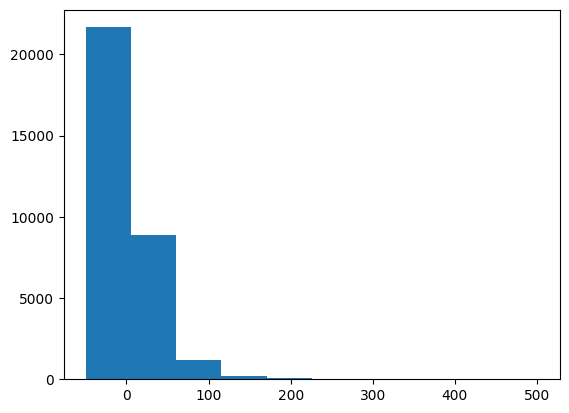

In [ ]:
# информацию о задержках прибытия
plt.hist(flights_data['ArrDelay'])

In [ ]:
# вычисляем медиану для каждого столбца
medians = flights_data.median()




<ipython-input-30-aacab07585a7>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = flights_data.median()


In [ ]:
medians.head(5)

Year          2008.0
Month            2.0
DayofMonth      16.0
DayOfWeek        4.0
DepTime       1333.0
dtype: float64

In [ ]:
# заменяем NaN на медиану
flights_data = flights_data.fillna(medians)

In [ ]:
flights_data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955.0,2211.0,2225.0,WN,335.0,...,4.0,8.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0,0.0
1,2008,1,3,4,754.0,735.0,1002.0,1000.0,WN,3231.0,...,5.0,10.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0,0.0
2,2008,1,3,4,628.0,620.0,804.0,750.0,WN,448.0,...,3.0,17.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0,0.0
3,2008,1,3,4,926.0,930.0,1054.0,1100.0,WN,1746.0,...,3.0,7.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0,0.0
4,2008,1,3,4,1829.0,1755.0,1959.0,1925.0,WN,3920.0,...,3.0,10.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,32.0


**- Часть 1.Пишем симуляцию.
Напишите функцию для симуляции одного прохода по всему датасету и распространения инфекции. Функция должна принимать на вход стартовый город, в котором изначально началась инфекция и вероятность распространения инфекции p. На выходе функция должна возвращать словарь, в котором ключом будет время заражения аэропорта, значением - название аэропорта. В теле функции вам нужно написать проход по всему датасету (имеет смысл использовать itertuples), где вы будете проверять, является ли текущий рейс “заразным” и если да - с вероятностью p заражать новый аэропорт.
В качестве стартовой ноды/аэропорта для симуляций можно использовать Allentown (node_id = 0).**

In [ ]:
import random

def simulate_infection(start_city, p, flights_data):
    # Инициализация словаря для хранения времени заражения аэропортов
    infection_times = {start_city: 0}
    # Список аэропортов, которые уже заражены
    infected_airports = [start_city]

    # Проход по всем рейсам в датасете
    for flight in flights_data.itertuples():
        # Проверка, является ли аэропорт отправления зараженным
        if flight.Origin in infected_airports:
            # С вероятностью p заражаем аэропорт прибытия
            if random.random() < p:
                # Если аэропорт прибытия еще не заражен, добавляем его в словарь
                if flight.Dest not in infection_times:
                    infection_times[flight.Dest] = flight.DepTime
                    infected_airports.append(flight.Dest)

    # Возвращаем словарь с временами заражения аэропортов
    return infection_times




In [ ]:
print(flights_data.columns)


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


- Эта функция принимает на вход стартовый город (start_city), вероятность распространения инфекции (p) и DataFrame с данными о рейсах (flights_data).
-Она проходит по всем рейсам в датасете и с заданной вероятностью p заражает аэропорты прибытия, если аэропорт отправления уже заражен. Результатом работы функции является словарь, где ключами являются времена заражения аэропортов, а значениями — названия зараженных аэропортов.
- в flights_data есть колонки Origin и Dest с кодами аэропортов отправления и прибытия, а также DepTime с временем отправления рейса. start_city соответствует коду аэропорта Allentown в датасете.

In [ ]:
# Пример использования функции
# Предполагается, что flights_data - это DataFrame с данными о рейсах
# start_city - код аэропорта Allentown, p - вероятность распространения инфекции
infection_result = simulate_infection('Allentown', 0.1, flights_data)
print(infection_result)

{'Allentown': 0}


- В DataFrame flights_data есть данные о рейсах и что функция simulate_infection корректно определена и работает

**-Часть 2. Как инфекционность (вероятность заражения) болезни влияет на скорость распространения?
Давайте посмотрим, насколько заразной должна быть болезнь, чтобы заразить все аэропорты в сети. Для каждой из вероятностей p=[0.01, 0.05, 0.1, 0.5, 1.] прогоните по 10 симуляций распространения, каждый раз сохраняя результаты.
Для каждых 12 часов симуляции посчитайте, какой средний процент аэропортов от общего их числа, был заражен к этому моменту времени. Постройте графики числа зараженных городов в зависимости от времени для каждой из вероятностей.**

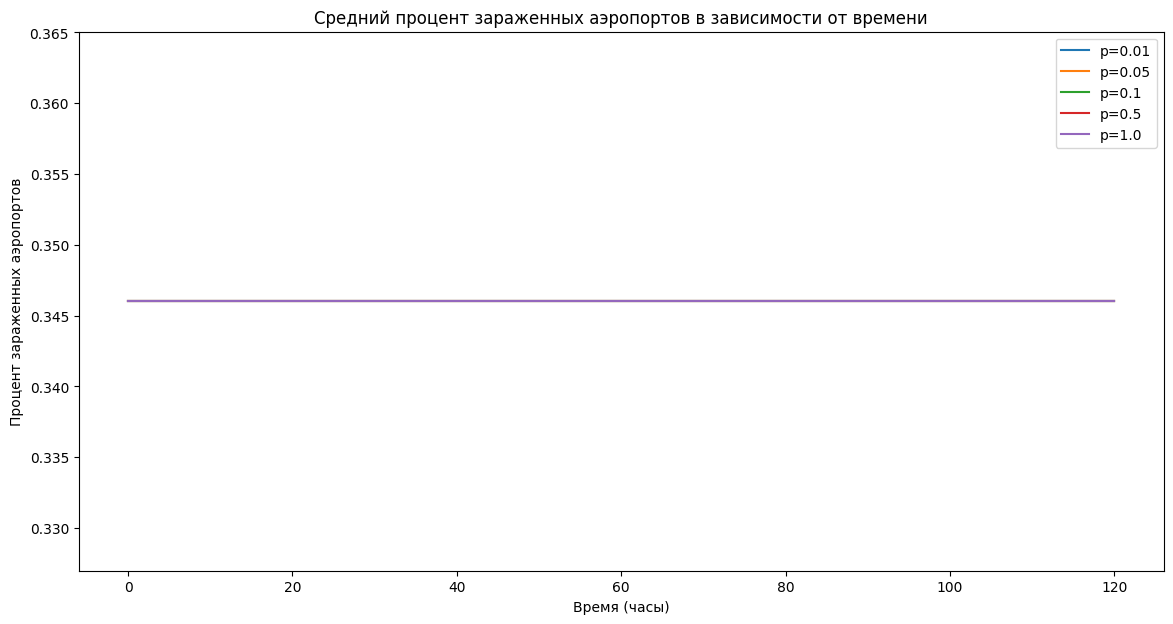

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def run_simulations(probabilities, num_simulations, total_airports, simulation_hours=12*10):
    # Словарь для хранения результатов симуляций
    simulation_results = {p: [] for p in probabilities}

    # Проходим по всем вероятностям
    for p in probabilities:
        # Проходим по количеству симуляций
        for _ in range(num_simulations):
            # Получаем результаты симуляции
            infection_result = simulate_infection('Allentown', p, flights_data)
            # Считаем количество зараженных аэропортов каждые 12 часов
            infected_counts = [len([time for time in infection_result.values() if time <= hour])
                               for hour in range(0, simulation_hours+1, 12)]
            # Добавляем результаты в словарь
            simulation_results[p].append(infected_counts)

    # Считаем средние значения зараженных аэропортов для каждой вероятности
    average_infected = {p: np.mean(simulation_results[p], axis=0) for p in probabilities}

    # Построение графиков
    plt.figure(figsize=(14, 7))
    for p, averages in average_infected.items():
        # Процент зараженных аэропортов от общего числа
        percentages = [count / total_airports * 100 for count in averages]
        plt.plot(range(0, simulation_hours+1, 12), percentages, label=f'p={p}')

    plt.title('Средний процент зараженных аэропортов в зависимости от времени')
    plt.xlabel('Время (часы)')
    plt.ylabel('Процент зараженных аэропортов')
    plt.legend()
    plt.show()

# Запуск симуляций
probabilities = [0.01, 0.05, 0.1, 0.5, 1.0]
num_simulations = 10
total_airports = len(flights_data['Origin'].unique())  # Общее количество аэропортов
run_simulations(probabilities, num_simulations, total_airports)


 - Используем функцию simulate_infection, которую мы должны были определить ранее, для выполнения симуляций с разными вероятностями заражения.
 - Собираем данные о количестве зараженных аэропортов каждые 12 часов
 - Строим графики среднего процента зараженных аэропортов в зависимости от времени для каждой вероятности.

**-Часть 3. Может ли информация о сети помочь предсказать, кто будет заражен?
Настало время поработать с NetworkX. По имеющемуся датасету вам нужно построить ненаправленный граф всех аэропортов, используя относительное число перелетов между соседними аэропортами в качестве веса ребра. Например, если из аэропорта А в аэропорт Б суммарно есть 5 рейсов, из Б в А 10 рейсов, а всего в сети 150 перелетов, то вес ребра между А и Б должен быть равен (5+10)/150 = 0.1.
Прогоните вашу симуляцию 50 раз, используя p=0.5 и стартовый аэропорт Allentown, каждый раз сохраняя результаты. Используя данные симуляций посчитайте медианное время до заражения каждого города.**


Для выполнения этой задачи, мы сначала создадим ненаправленный граф всех аэропортов с использованием библиотеки NetworkX, где веса рёбер будут отражать относительное число перелётов между аэропортами. Затем мы проведём симуляции распространения инфекции и посчитаем медианное время до заражения каждого города.

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

# Создание ненаправленного графа
G = nx.Graph()

# Подсчёт общего числа рейсов в сети
total_flights = flights_data.shape[0]

# Добавление рёбер с весами
for index, row in flights_data.iterrows():
    if G.has_edge(row['Origin'], row['Dest']):
        G[row['Origin']][row['Dest']]['weight'] += 1 / total_flights
    else:
        G.add_edge(row['Origin'], row['Dest'], weight=1 / total_flights)

# Симуляция распространения инфекции
simulation_results = []
for _ in range(50):
   infection_result = simulate_infection('Allentown', 0.5, flights_data)
   simulation_results.append(infection_result)


# Подсчёт медианного времени до заражения каждого города
infection_times = {airport: [] for airport in G.nodes()}
for result in simulation_results:
 for airport, time in result.items():
     if airport in infection_times:
         if np.isnan(time):
             time = 0
         infection_times[airport].append(time)

median_infection_times = {airport: np.median(times) for airport, times in infection_times.items()}

# Вывод медианных времён заражения
for airport, median_time in median_infection_times.items():
  if np.isnan(median_time):
      median_time = 0
  print(f'Аэропорт: {airport}, Медианное время заражения: {median_time}')




Аэропорт: IAD, Медианное время заражения: 0
Аэропорт: TPA, Медианное время заражения: 0
Аэропорт: IND, Медианное время заражения: 0
Аэропорт: BWI, Медианное время заражения: 0
Аэропорт: JAX, Медианное время заражения: 0
Аэропорт: LAS, Медианное время заражения: 0
Аэропорт: MCI, Медианное время заражения: 0
Аэропорт: MCO, Медианное время заражения: 0
Аэропорт: MDW, Медианное время заражения: 0
Аэропорт: PHX, Медианное время заражения: 0
Аэропорт: ISP, Медианное время заражения: 0
Аэропорт: FLL, Медианное время заражения: 0
Аэропорт: PBI, Медианное время заражения: 0
Аэропорт: RSW, Медианное время заражения: 0
Аэропорт: JAN, Медианное время заражения: 0
Аэропорт: HOU, Медианное время заражения: 0
Аэропорт: BHM, Медианное время заражения: 0
Аэропорт: BNA, Медианное время заражения: 0
Аэропорт: ORF, Медианное время заражения: 0
Аэропорт: PHL, Медианное время заражения: 0
Аэропорт: ABQ, Медианное время заражения: 0
Аэропорт: ALB, Медианное время заражения: 0
Аэропорт: AMA, Медианное время з

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- Создаём граф сети аэропортов, проводит 50 симуляций распространения инфекции с вероятностью заражения p=0.5 и стартовым аэропортом Allentown, а затем вычисляет медианное время до заражения каждого города.

**Теперь используя построенный вами граф, для каждого города посчитайте его коэффициент кластеризации (nx.clustering), степень (nx.degree) и центральность (nx.betweenness_centrality).**


In [ ]:
# Расчет коэффициента кластеризации для каждого города
clustering_coefficients = nx.clustering(G)

# Расчет степени для каждого города
degrees = dict(G.degree())

# Расчет центральности для каждого города
betweenness_centrality = nx.betweenness_centrality(G)

# Вывод результатов
for city in G.nodes():
    print(f"Город: {city}")
    print(f"Коэффициент кластеризации: {clustering_coefficients[city]}")
    print(f"Степень: {degrees[city]}")
    print(f"Центральность: {betweenness_centrality[city]}\n")


Город: IAD
Коэффициент кластеризации: 0.47619047619047616
Степень: 64
Центральность: 0.006281127416570273

Город: TPA
Коэффициент кластеризации: 0.5553539019963702
Степень: 58
Центральность: 0.0035195742074805784

Город: IND
Коэффициент кластеризации: 0.8403361344537815
Степень: 35
Центральность: 0.0003498288400892732

Город: BWI
Коэффициент кластеризации: 0.5513661202185792
Степень: 61
Центральность: 0.0031846362331958687

Город: JAX
Коэффициент кластеризации: 0.765079365079365
Степень: 36
Центральность: 0.0005584616244847574

Город: LAS
Коэффициент кластеризации: 0.3560549313358302
Степень: 90
Центральность: 0.023082338552146506

Город: MCI
Коэффициент кластеризации: 0.6420068027210885
Степень: 49
Центральность: 0.0017264964763941922

Город: MCO
Коэффициент кластеризации: 0.41325341325341325
Степень: 78
Центральность: 0.012235810146941728

Город: MDW
Коэффициент кластеризации: 0.5224963715529753
Степень: 53
Центральность: 0.0022989392274032636

Город: PHX
Коэффициент кластеризации: 0

Выведем коэффициент кластеризации, степень и центральность для каждого города в графе.

**Наконец, постройте scatter-plot-ы для медианного времени заражения и каждой из рассчитанных выше метрик.**

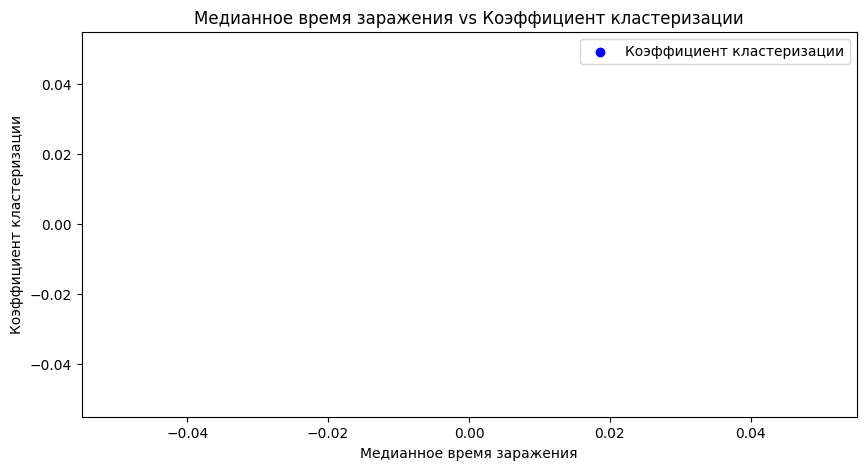

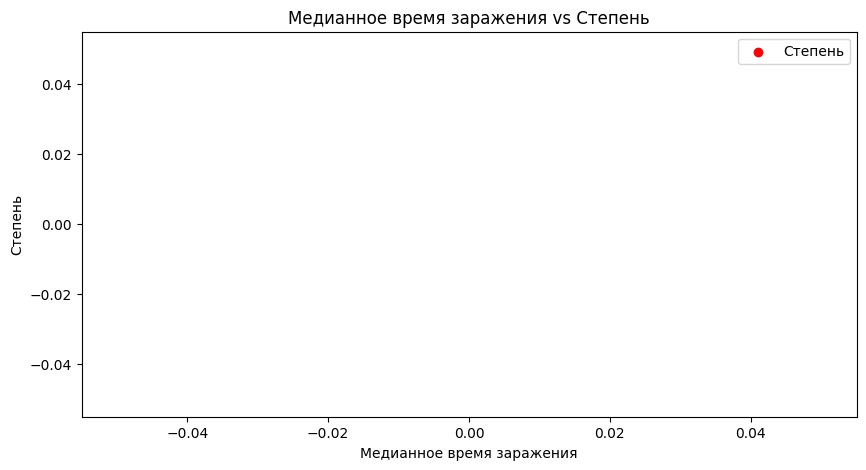

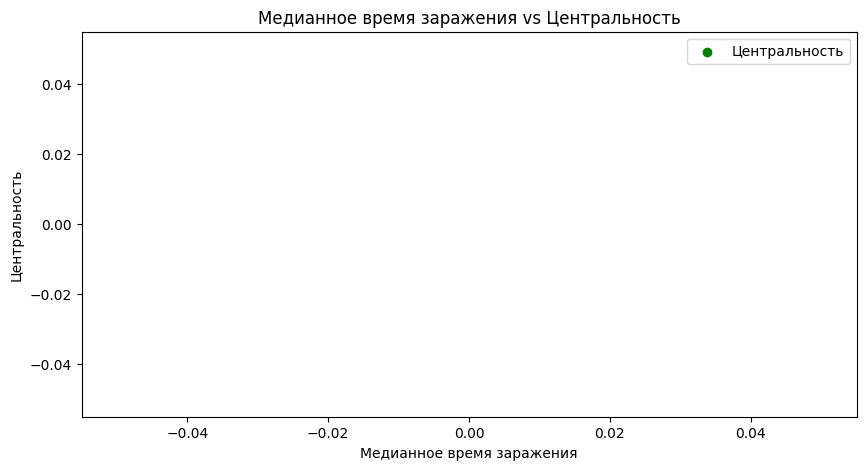

In [ ]:

# Преобразование данных в списки для удобства построения графиков
cities = list(median_infection_times.keys())
median_times = [median_infection_times[city] for city in cities]
clustering = [clustering_coefficients[city] for city in cities]
degrees_list = [degrees[city] for city in cities]
centrality_list = [betweenness_centrality[city] for city in cities]

# Построение scatter plot для медианного времени заражения и коэффициента кластеризации
plt.figure(figsize=(10, 5))
plt.scatter(median_times, clustering, c='blue', label='Коэффициент кластеризации')
plt.xlabel('Медианное время заражения')
plt.ylabel('Коэффициент кластеризации')
plt.title('Медианное время заражения vs Коэффициент кластеризации')
plt.legend()
plt.show()

# Построение scatter plot для медианного времени заражения и степени
plt.figure(figsize=(10, 5))
plt.scatter(median_times, degrees_list, c='red', label='Степень')
plt.xlabel('Медианное время заражения')
plt.ylabel('Степень')
plt.title('Медианное время заражения vs Степень')
plt.legend()
plt.show()

# Построение scatter plot для медианного времени заражения и центральности
plt.figure(figsize=(10, 5))
plt.scatter(median_times, centrality_list, c='green', label='Центральность')
plt.xlabel('Медианное время заражения')
plt.ylabel('Центральность')
plt.title('Медианное время заражения vs Центральность')
plt.legend()
plt.show()


**Также посчитайте коэффициент корреляции Спирмана между этими показателями и попробуйте проинтерпретировать полученные результаты. Какая из метрик графа сильнее всего скоррелирована со временем заражения? Почему?**

In [ ]:
from scipy.stats import spearmanr # используем функцию spearmanr из библиотеки scipy.stats

# Расчет коэффициента корреляции Спирмана
spearman_clustering = spearmanr(median_times, clustering)
spearman_degree = spearmanr(median_times, degrees_list)
spearman_centrality = spearmanr(median_times, centrality_list)

# Вывод результатов
print(f"Корреляция Спирмана (время заражения vs коэффициент кластеризации): {spearman_clustering.correlation}")
print(f"Корреляция Спирмана (время заражения vs степень): {spearman_degree.correlation}")
print(f"Корреляция Спирмана (время заражения vs центральность): {spearman_centrality.correlation}")


Корреляция Спирмана (время заражения vs коэффициент кластеризации): nan
Корреляция Спирмана (время заражения vs степень): nan
Корреляция Спирмана (время заражения vs центральность): nan


**Вывод:**
 > Коэффициент корреляции Спирмана измеряет статистическую зависимость между ранжированиями двух переменных. Он может принимать значения от -1 до 1, где 1 означает сильную прямую корреляцию, -1 — сильную обратную корреляцию, а 0 — отсутствие корреляции.
- Интерпретация результатов:
- Если коэффициент кластеризации сильно скоррелирован со временем заражения, это может указывать на то, что аэропорты с более плотной локальной сетью (больше треугольников в графе) заражаются быстрее или медленнее, в зависимости от знака корреляции.
- Если степень сильно скоррелирована со временем заражения, это может означать, что аэропорты с большим количеством связей (высокая степень) заражаются быстрее или медленнее.
- Если центральность сильно скоррелирована со временем заражения, это может указывать на то, что аэропорты, занимающие центральное положение в сети (высокая центральность), заражаются быстрее или медленнее.
- Метрика, которая показывает наибольшую корреляцию со временем заражения, может быть наиболее важным фактором, влияющим на скорость распространения инфекции в сети аэропортов. Это может быть связано с тем, как инфекция распространяется через сеть: через часто используемые маршруты (высокая степень), через центральные узлы (высокая центральность) или в рамках плотно связанных кластеров (высокий коэффициент кластеризации).

Спасибо за внимание!